In [1]:
import sys
sys.path.append("../")

In [2]:
import logging

# logging.basicConfig(level=logging.DEBUG)
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger("main")

In [3]:
from numpy import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
from tutor.cogtutor_curriculum import CogTutorCurriculum
from tutor.domain import Domain

In [5]:
domain = Domain()

In [6]:
curric = CogTutorCurriculum(domain)
curric.generate(num_units=60,
               mean_sections=4,
               stdev_sections=2,
               mean_unit_kcs=22,
               stdev_unit_kcs=23,
               section_kcs_lambda=6,
               mean_steps=10,
               stdev_steps=4,
               mean_prob_kcs=6,
               stdev_prob_kcs=3,
               num_practice=100)

INFO:tutor.cogtutor_curriculum:Generated 60 units with with a total of 1534 kcs


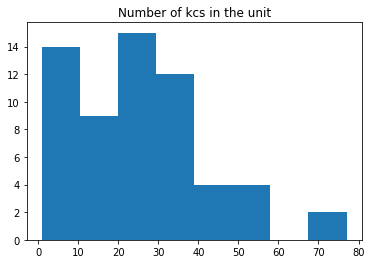

INFO:main:Total number of kcs: 1534
INFO:main:count    60.000000
mean     25.566667
std      16.969930
min       1.000000
25%      12.750000
50%      24.500000
75%      33.500000
max      77.000000
dtype: float64


In [7]:
unit_kcs = [len(unit.kcs) for unit in curric.units]
plt.hist(unit_kcs, bins=8)
plt.title("Number of kcs in the unit")
plt.show()
logger.info("Total number of kcs: %i" % np.sum(unit_kcs))
logger.info(pd.Series(unit_kcs).describe())

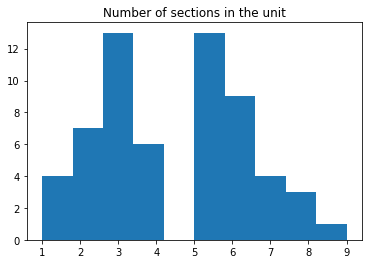

INFO:main:Total number of sections: 261
INFO:main:count    60.0000
mean      4.3500
std       1.9643
min       1.0000
25%       3.0000
50%       4.5000
75%       6.0000
max       9.0000
dtype: float64


In [8]:
unit_sections = [len(unit.sections) for unit in curric.units]
plt.hist(unit_sections, bins=10)
plt.title("Number of sections in the unit")
plt.show()
logger.info("Total number of sections: %i" % np.sum(unit_sections))
logger.info(pd.Series(unit_sections).describe())

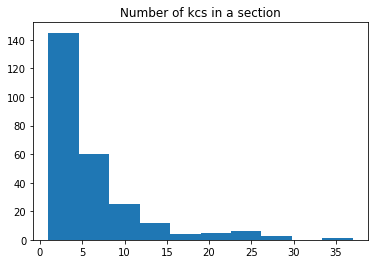

INFO:main:count    261.000000
mean       5.877395
std        6.001306
min        1.000000
25%        2.000000
50%        4.000000
75%        8.000000
max       37.000000
dtype: float64


In [9]:
section_kcs = []
for unit in curric.units:
    section_kcs.extend([len(section.kcs) for section in unit.sections])
plt.hist(section_kcs, bins=10)
plt.title("Number of kcs in a section")
plt.show()
logger.info(pd.Series(section_kcs).describe())

INFO:main:Distribution of steps per problems: 
1     4642.0
2     5333.0
3     7503.0
4     8796.0
5     7781.0
6     5424.0
7     2897.0
8     1228.0
9      417.0
10     121.0
11      25.0
12       5.0
dtype: float64


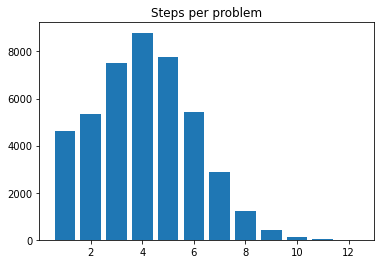

In [18]:
# steps per problem EDA
step_counts = []
for unit in curric.units:
    for section in unit.sections:
 #       logger.info("Section with %i kcs and %i problems" % (len(section.kcs), len(section.problems)))
        counts = pd.Series([len(prob.steps) for prob in section.problems]).value_counts()
#        logger.info("Counts of steps per problems \n%s" % str(counts))
        step_counts.append(counts)

    
prob_steps = pd.DataFrame(step_counts).sum(axis=0)
logger.info("Distribution of steps per problems: \n%s" %  str(prob_steps))
plt.bar(prob_steps.index, prob_steps)
plt.title("Steps per problem")
plt.show()

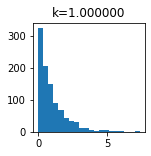

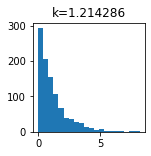

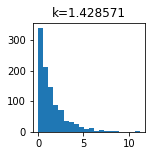

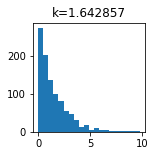

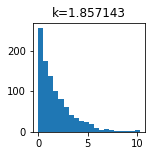

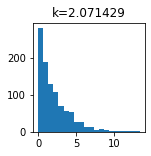

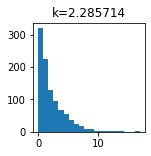

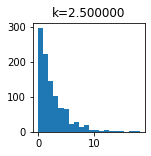

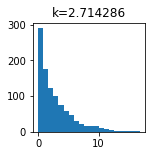

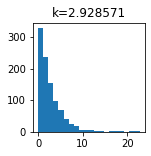

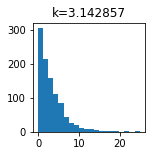

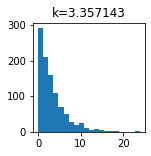

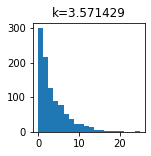

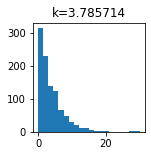

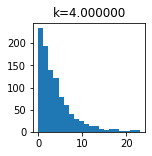

In [19]:
size = 1000
# Experiment with exponential curve parameters
for k in np.linspace(1,4,15):
    #print(k)
    d = random.exponential(k, size) 
    plt.figure(figsize=(2,2))
    plt.hist(d, bins=20)
    plt.title("k=%f" % k)
    plt.show()
